# Customer Segmentation Project in R

Customer Segmentation is one the most important applications of unsupervised learning. Using clustering techniques, companies can identify the several segments of customers allowing them to target the potential user base. In this machine learning project, we will make use of K-means clustering which is the essential algorithm for clustering unlabeled dataset.

# What is Customer Segmentation?
Customer Segmentation is the process of division of customer base into several groups of individuals that share a similarity in different ways that are relevant to marketing such as gender, age, interests, and miscellaneous spending habits.

# Implementing Customer Segmentation in R?

- In the first step of this data science project, we will perform data exploration. 

- We will import the essential packages required for this role and then read our data. 

- Finally, we will go through the input data to gain necessary insights about it.

In [1]:
customer_data <- read.csv("../input/customersegmentationdataset/Mall_Customers.csv")

In [2]:
dim(customer_data)
str(customer_data)

names(customer_data)

[1] 200   5

'data.frame':	200 obs. of  5 variables:
 $ CustomerID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Gender                : Factor w/ 2 levels "Female","Male": 2 2 1 1 1 1 1 1 2 1 ...
 $ Age                   : int  19 21 20 23 31 22 35 23 64 30 ...
 $ Annual.Income..k..    : int  15 15 16 16 17 17 18 18 19 19 ...
 $ Spending.Score..1.100.: int  39 81 6 77 40 76 6 94 3 72 ...


[1] "CustomerID"             "Gender"                 "Age"                   
[4] "Annual.Income..k.."     "Spending.Score..1.100."

We will now display the first six rows of our dataset using the head() function and use the summary() function to Age.

In [3]:
head(customer_data)
summary(customer_data$Age)
sd(customer_data$Age)

,CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
,<int>,<fct>,<int>,<int>,<int>
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77
5,5,Female,31,17,40
6,6,Female,22,17,76


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

[1] 13.96901

In [4]:
summary(customer_data$Annual.Income..k..)
sd(customer_data$Annual.Income..k..)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

[1] 26.26472

In [5]:
summary(customer_data$Spending.Score..1.100.)
sd(customer_data$Spending.Score..1.100.)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   34.75   50.00   50.20   73.00   99.00 

[1] 25.82352

# Customer Gender Visualization

we will create a barplot and a piechart to show the gender distribution across our customer_data dataset.

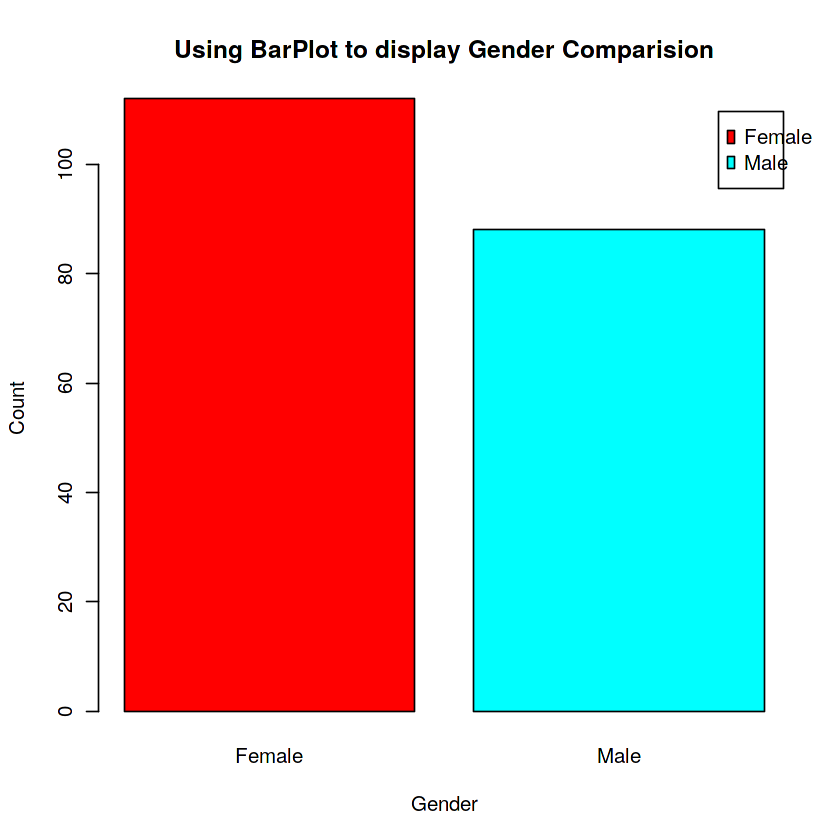

In [6]:
a=table(customer_data$Gender)
barplot(a,main="Using BarPlot to display Gender Comparision",
       ylab="Count",
       xlab="Gender",
       col=rainbow(2),
       legend=rownames(a))

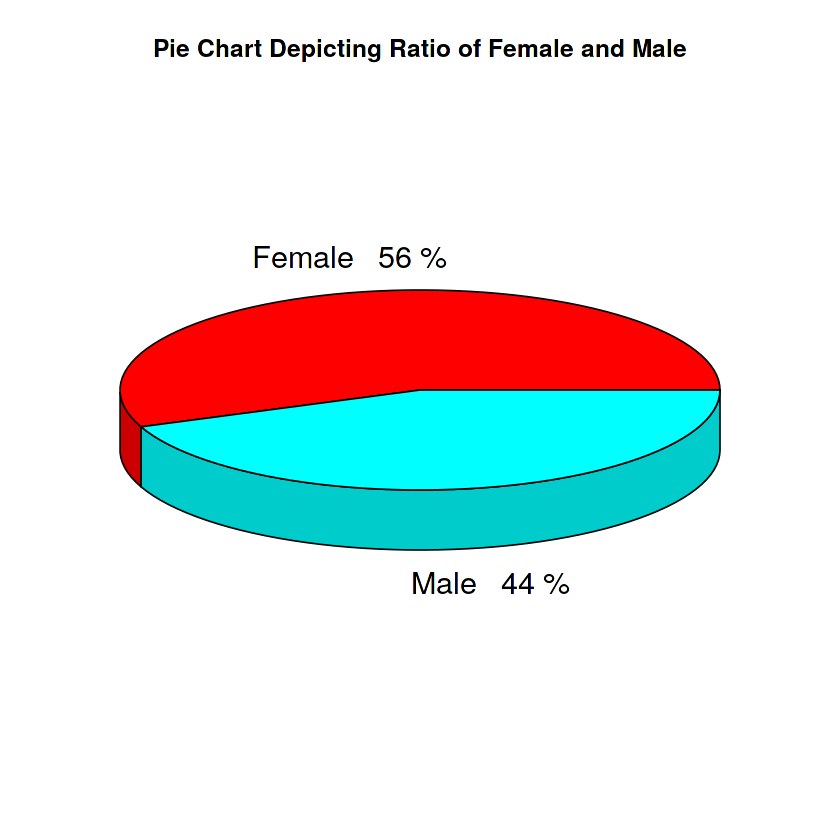

In [7]:
pct=round(a/sum(a)*100)
lbs=paste(c("Female","Male")," ",pct,"%",sep=" ")
library(plotrix)
pie3D(a,labels=lbs,
   main="Pie Chart Depicting Ratio of Female and Male")

From the above graph, we conclude that the percentage of females is 56%, whereas the percentage of male in the customer dataset is 44%.

# Visualization of Age Distribution

Let us plot a histogram to view the distribution to plot the frequency of customer ages. We will first proceed by taking summary of the Age variable.

In [8]:
summary(customer_data$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

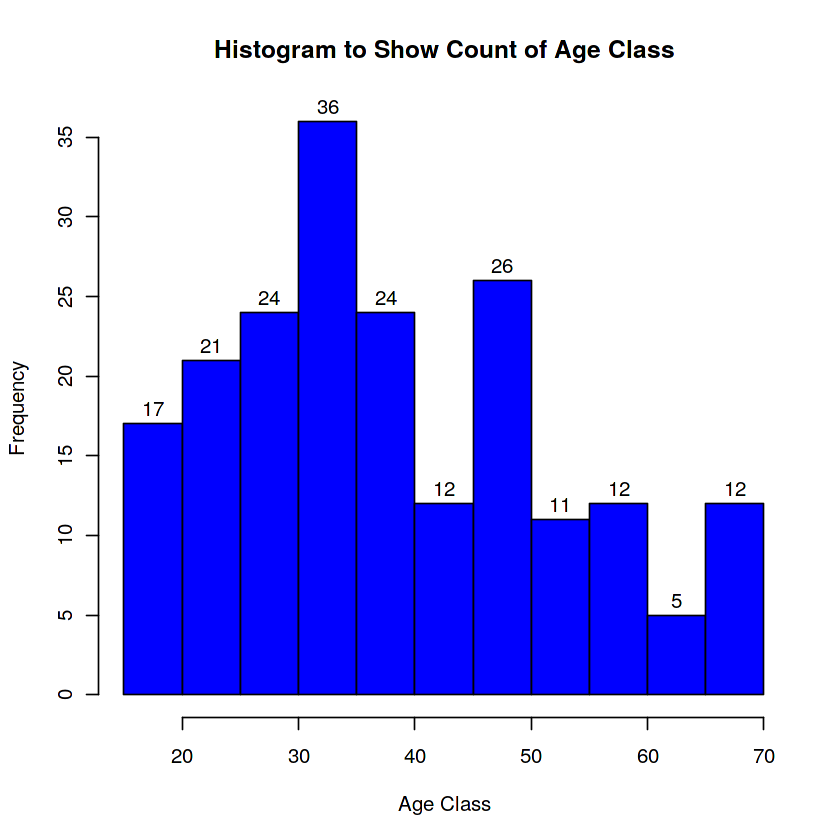

In [9]:
hist(customer_data$Age,
    col="blue",
    main="Histogram to Show Count of Age Class",
    xlab="Age Class",
    ylab="Frequency",
    labels=TRUE)

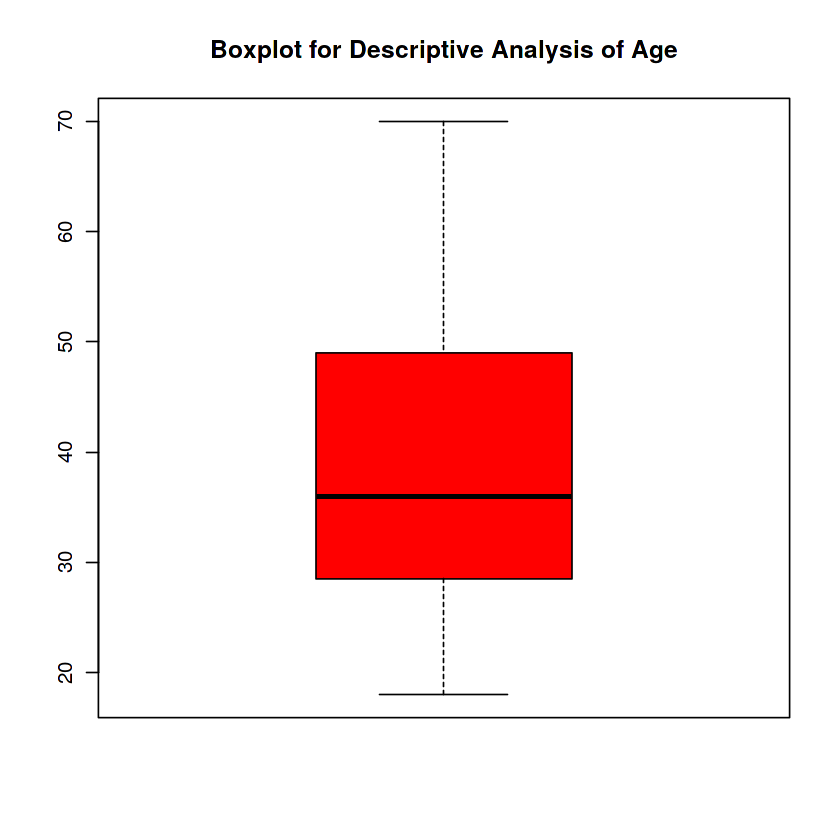

In [10]:
boxplot(customer_data$Age,
       col="red",
       main="Boxplot for Descriptive Analysis of Age")

From the above two visualizations, we conclude that the maximum customer ages are between 30 and 35. The minimum age of customers is 18, whereas, the maximum age is 70.

# Analysis of the Annual Income of the Customers

we will create visualizations to analyze the annual income of the customers. We will plot a histogram and then we will proceed to examine this data using a density plot.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

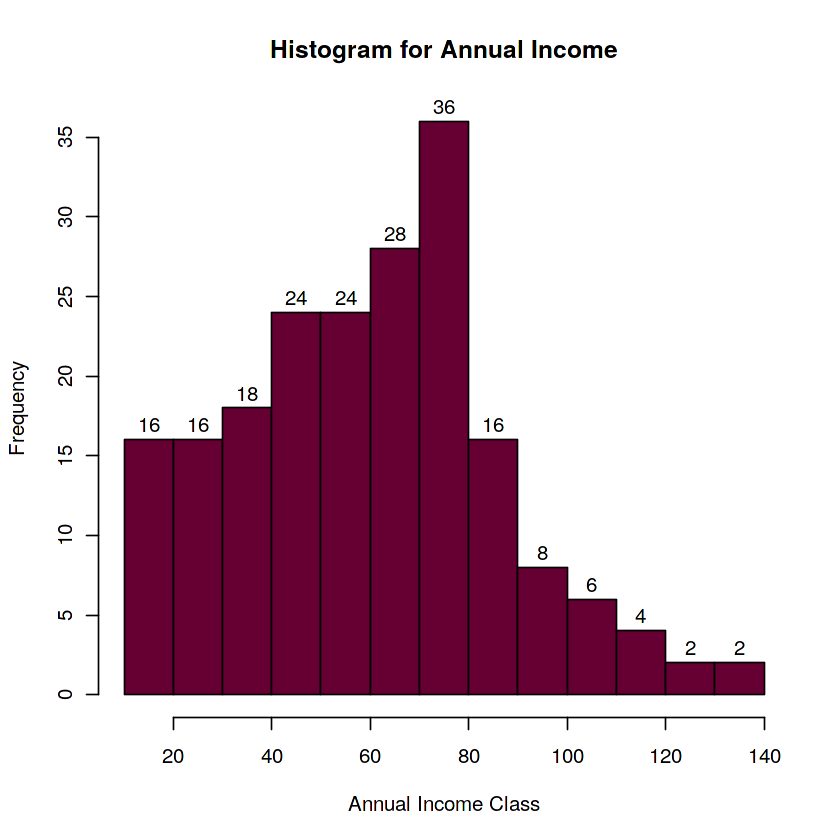

In [11]:
summary(customer_data$Annual.Income..k..)
hist(customer_data$Annual.Income..k..,
  col="#660033",
  main="Histogram for Annual Income",
  xlab="Annual Income Class",
  ylab="Frequency",
  labels=TRUE)

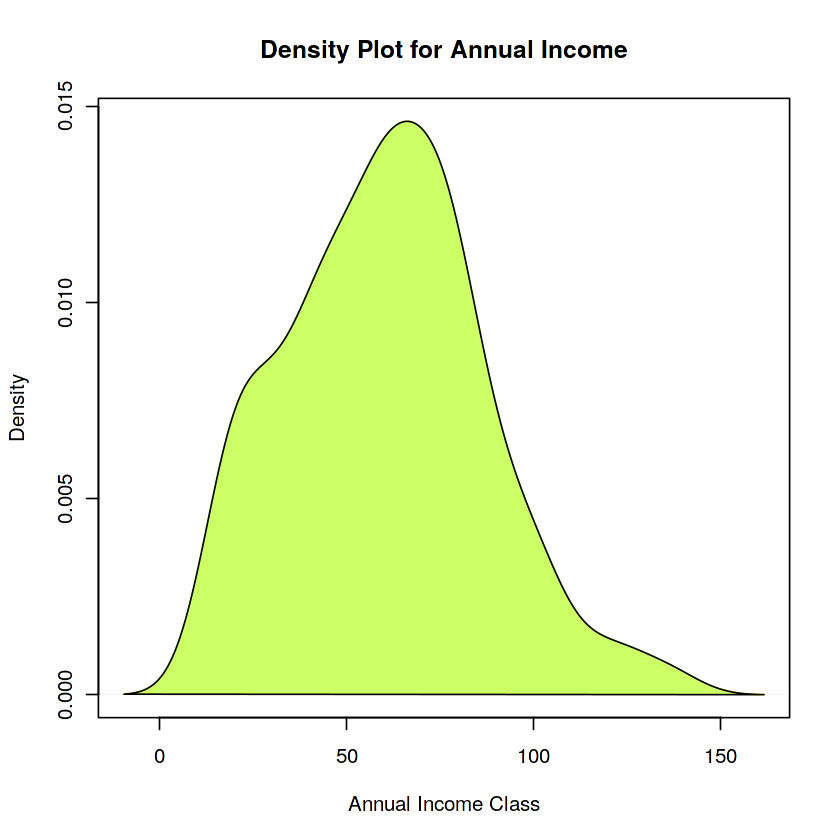

In [12]:
plot(density(customer_data$Annual.Income..k..),
    col="yellow",
    main="Density Plot for Annual Income",
    xlab="Annual Income Class",
    ylab="Density")
polygon(density(customer_data$Annual.Income..k..),
        col="#ccff66")

From the above descriptive analysis, we conclude that the minimum annual income of the customers is 15 and the maximum income is 137. People earning an average income of 70 have the highest frequency count in our histogram distribution. The average salary of all the customers is 60.56. In the Kernel Density Plot that we displayed above, we observe that the annual income has a normal distribution.

# Analyzing Spending Score of the Customers

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   34.75   50.00   50.20   73.00   99.00 

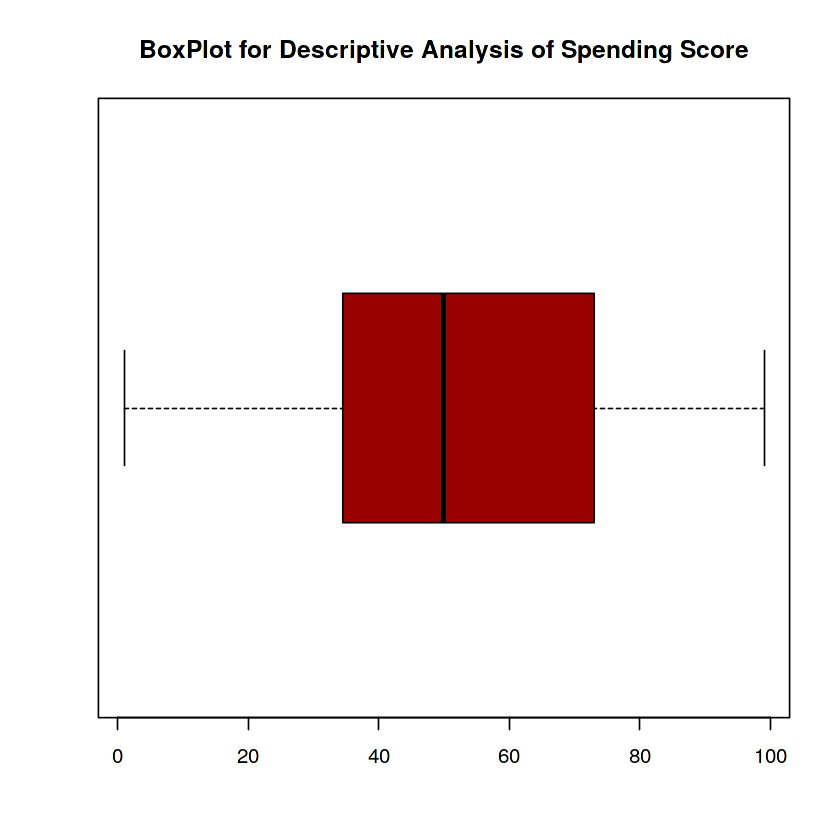

In [13]:
summary(customer_data$Spending.Score..1.100.)

boxplot(customer_data$Spending.Score..1.100.,
   horizontal=TRUE,
   col="#990000",
   main="BoxPlot for Descriptive Analysis of Spending Score")

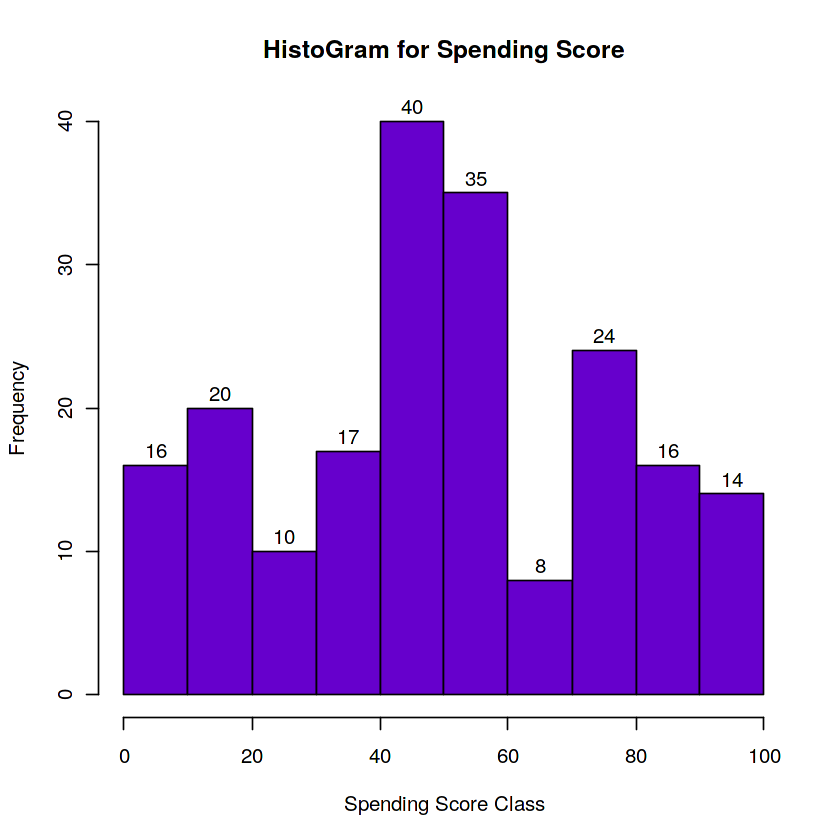

In [14]:
hist(customer_data$Spending.Score..1.100.,
    main="HistoGram for Spending Score",
    xlab="Spending Score Class",
    ylab="Frequency",
    col="#6600cc",
    labels=TRUE)

The minimum spending score is 1, maximum is 99 and the average is 50.20. We can see Descriptive Analysis of Spending Score is that Min is 1, Max is 99 and avg. is 50.20. From the histogram, we conclude that customers between class 40 and 50 have the highest spending score among all the classes.

# K-means Algorithm

While using the k-means clustering algorithm, the first step is to indicate the number of clusters (k) that we wish to produce in the final output. The algorithm starts by selecting k objects from dataset randomly that will serve as the initial centers for our clusters. These selected objects are the cluster means, also known as centroids. Then, the remaining objects have an assignment of the closest centroid. This centroid is defined by the Euclidean Distance present between the object and the cluster mean. We refer to this step as “cluster assignment”. When the assignment is complete, the algorithm proceeds to calculate new mean value of each cluster present in the data. After the recalculation of the centers, the observations are checked if they are closer to a different cluster. Using the updated cluster mean, the objects undergo reassignment. This goes on repeatedly through several iterations until the cluster assignments stop altering. The clusters that are present in the current iteration are the same as the ones obtained in the previous iteration.

# Determining Optimal Clusters

While working with clusters, we need to specify the number of clusters to use. we would like to utilize the optimal number of clusters. To help in determining the optimal clusters, there a popular method

Elbow method

## Elbow Method

The main goal behind cluster partitioning methods like k-means is to define the clusters such that the intra-cluster variation stays minimum.

minimize(sum W(Ck)), k=1…k

Where Ck represents the kth cluster and W(Ck) denotes the intra-cluster variation. With the measurement of the total intra-cluster variation, one can evaluate the compactness of the clustering boundary. We can then proceed to define the optimal clusters as follows –

First, we calculate the clustering algorithm for several values of k. This can be done by creating a variation within k from 1 to 10 clusters. We then calculate the total intra-cluster sum of square (iss). Then, we proceed to plot iss based on the number of k clusters. This plot denotes the appropriate number of clusters required in our model. In the plot, the location of a bend or a knee is the indication of the optimum number of clusters. Let us implement this in R as follows.

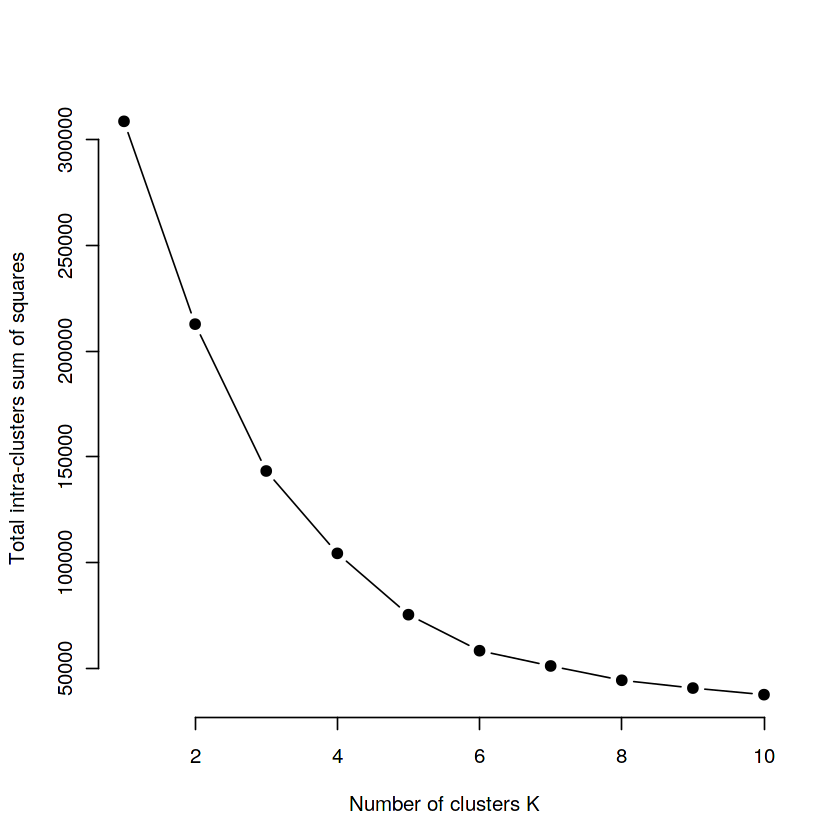

In [15]:
library(purrr)
set.seed(123)
# function to calculate total intra-cluster sum of square 
iss <- function(k) {
  kmeans(customer_data[,3:5],k,iter.max=100,nstart=100,algorithm="Lloyd" )$tot.withinss
}

k.values <- 1:10


iss_values <- map_dbl(k.values, iss)

plot(k.values, iss_values,
    type="b", pch = 19, frame = FALSE, 
    xlab="Number of clusters K",
    ylab="Total intra-clusters sum of squares")

From the above graph, we conclude that 5 is the appropriate number of clusters since it seems to be appearing at the bend in the elbow plot.

- cluster – This is a vector of several integers that denote the cluster which has an allocation of each point.

- totss – This represents the total sum of squares.

- centers – Matrix comprising of several cluster centers

- withinss – This is a vector representing the intra-cluster sum of squares having one component per cluster.

- tot.withinss – This denotes the total intra-cluster sum of squares.

- betweenss – This is the sum of between-cluster squares.

- size – The total number of points that each cluster holds.

In [16]:
k2<-kmeans(customer_data[,3:5],2,iter.max=100,nstart=50,algorithm="Lloyd")
k3<-kmeans(customer_data[,3:5],3,iter.max=100,nstart=50,algorithm="Lloyd")
k4<-kmeans(customer_data[,3:5],4,iter.max=100,nstart=50,algorithm="Lloyd")
k5<-kmeans(customer_data[,3:5],5,iter.max=100,nstart=50,algorithm="Lloyd")

# Visualizing the Clustering Results

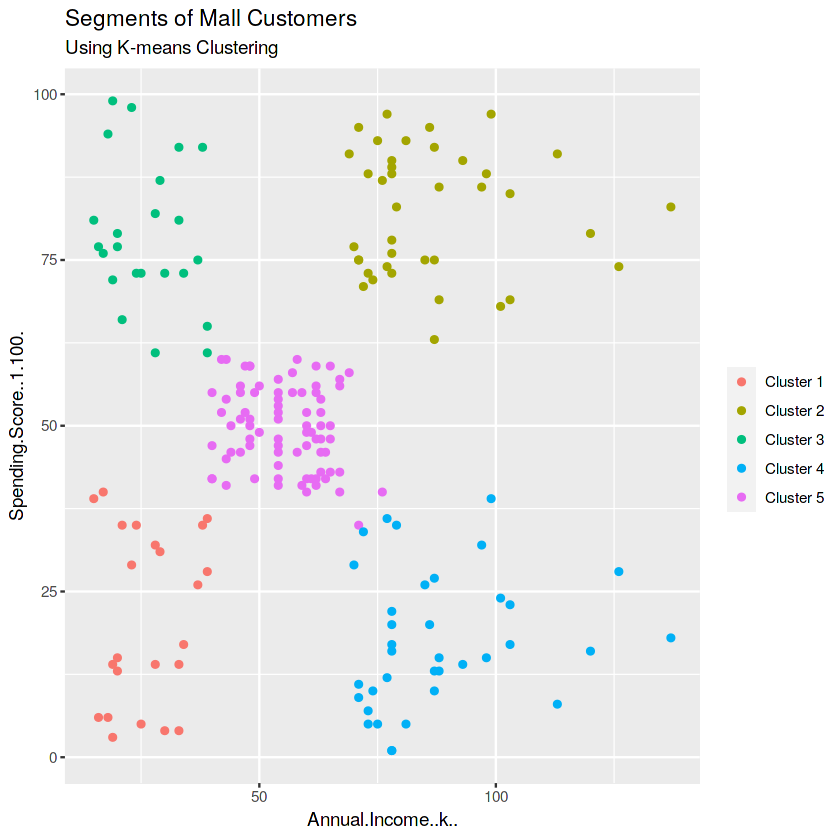

In [17]:
library(ggplot2)
set.seed(1)
ggplot(customer_data, aes(x =Annual.Income..k.., y = Spending.Score..1.100.)) + 
  geom_point(stat = "identity", aes(color = as.factor(k5$cluster))) +
  scale_color_discrete(name=" ",
              breaks=c("1", "2", "3", "4", "5"),
              labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")

## From the above visualization, we observe that there is a distribution of 6 clusters as follows –

- Cluster 4 – These clusters represent the customer_data with the medium income salary as well as the medium annual spend of salary.

- Cluster 5 – This cluster represents the customer_data having a high annual income as well as a high annual spend.

- Cluster 2 – This cluster denotes the customer_data with low annual income as well as low yearly spend of income.

- Cluster 1 – This cluster denotes a high annual income and low yearly spend.

- Cluster 3 – This cluster represents a low annual income but its high yearly expenditure.